# 🚢 Titanic Veri Analizi

Bu not defterinde Titanic veri seti üzerinde bazı temel veri analizi sorularını yanıtlayacağız. Pandas kütüphanesi ile veri manipülasyonu yapacağız. Her adımda önce markdown ile soruyu yazıyor, ardından kod ile çözüyoruz.

**Veri seti:** [Kaggle Titanic Competition](https://www.kaggle.com/c/titanic/data)


## 1. Gerekli Kütüphanelerin Yüklenmesi ve Verinin Yüklenmesi

In [1]:
import pandas as pd
import numpy as np

# Titanic veri setini yükleme
df_titanic = pd.read_csv("/content/Titanic_dataset.csv")

# İlk birkaç satırı görüntüle
df_titanic.head()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


/tmp/ipython-input-15-841536664.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(df_titanic, x='Survived', y='Embarked', inner='box', palette='Dark2')


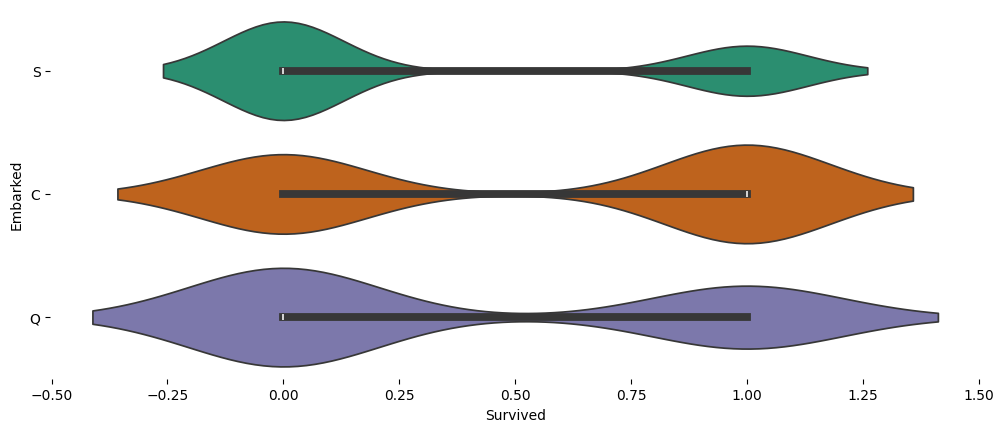

In [15]:
# @title Embarked vs Survived

from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(df_titanic['Embarked'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(df_titanic, x='Survived', y='Embarked', inner='box', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

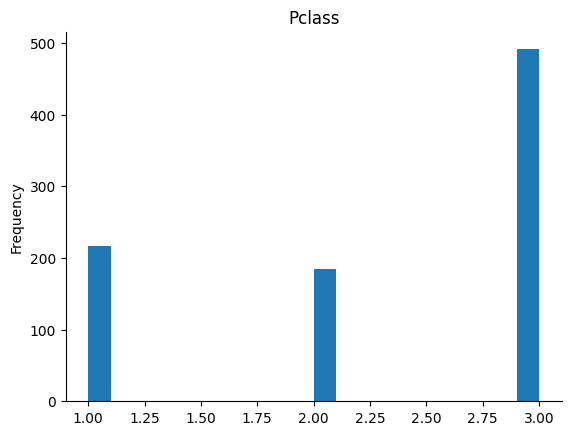

In [14]:
# @title Pclass

from matplotlib import pyplot as plt
df_titanic['Pclass'].plot(kind='hist', bins=20, title='Pclass')
plt.gca().spines[['top', 'right',]].set_visible(False)

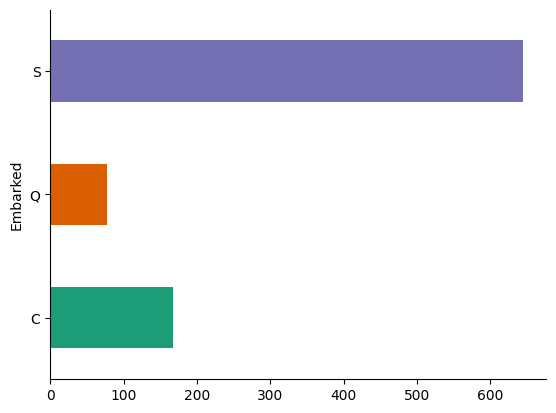

In [13]:
# @title Embarked

from matplotlib import pyplot as plt
import seaborn as sns
df_titanic.groupby('Embarked').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

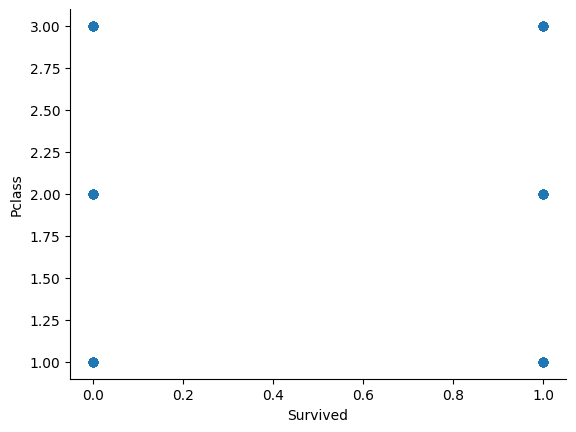

In [12]:
# @title Survived vs Pclass

from matplotlib import pyplot as plt
df_titanic.plot(kind='scatter', x='Survived', y='Pclass', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

## 2. Kazada ölenlerin yaş ortalamasını bulunuz

In [2]:
mean_age_dead = df_titanic[df_titanic["Survived"] == 0]["Age"].mean()
mean_age_dead

np.float64(30.62617924528302)

**Değerlendirme:** Ölen yolcuların yaş ortalaması, felakette daha çok hangi yaş grubunun etkilendiğine dair bize fikir verebilir.

## 3. Kazada ölenlerin bilet fiyatlarının ortalaması ve medyanını bulunuz

In [3]:
fare_dead = df_titanic[df_titanic["Survived"] == 0]["Fare"]
mean_fare_dead = fare_dead.mean()
median_fare_dead = fare_dead.median()
mean_fare_dead, median_fare_dead

(np.float64(22.117886885245902), 10.5)

**Değerlendirme:** Bilet fiyatları genellikle sınıf ve sosyoekonomik durumu yansıttığı için bu istatistikler önemlidir.

## 4. Kazada ölen erkeklerin yaş ortalamasını bulunuz

In [4]:
mean_age_dead_men = df_titanic[(df_titanic["Survived"] == 0) & (df_titanic["Sex"] == "male")]["Age"].mean()
mean_age_dead_men

np.float64(31.618055555555557)

**Değerlendirme:** Ölen erkeklerin yaş ortalaması, kadın ve çocukların önceliği varsayımını sınamamıza yardımcı olabilir.

## 5. Kazada ölen kadınların yaş ortalamasını bulunuz

In [5]:
mean_age_dead_women = df_titanic[(df_titanic["Survived"] == 0) & (df_titanic["Sex"] == "female")]["Age"].mean()
mean_age_dead_women

np.float64(25.046875)

**Değerlendirme:** Kadınlar için yaş dağılımı farklı olabilir. Genç veya yaşlı kadınlar daha çok etkilenmiş olabilir.

## 6. Kazadan kurtulanların yaş ortalamasını bulunuz

In [6]:
mean_age_survived = df_titanic[df_titanic["Survived"] == 1]["Age"].mean()
mean_age_survived

np.float64(28.343689655172415)

**Değerlendirme:** Hayatta kalanların yaş ortalaması, kurtarma sırasında kimlere öncelik verildiğini gösterebilir.

## 7. Kazadan kurtulanların bilet fiyatlarının ortalamasını bulunuz

In [7]:
mean_fare_survived = df_titanic[df_titanic["Survived"] == 1]["Fare"].mean()
mean_fare_survived

np.float64(48.39540760233918)

**Değerlendirme:** Hayatta kalanların ortalama bilet fiyatı, üst sınıf yolcuların kurtarılma oranıyla ilişkili olabilir.

## 8. Kazadan kurtulan toplam kişi sayısını bulunuz

In [8]:
num_survived = len(df_titanic[df_titanic["Survived"] == 1])
num_survived

342

**Değerlendirme:** Toplam hayatta kalan kişi sayısı, genel hayatta kalma oranlarını anlamamız açısından temel bir metriktir.

## 9. 10 yaşından küçüklerin bilet fiyatlarının medyan değerini bulunuz

In [9]:
median_fare_under_10 = df_titanic[df_titanic["Age"] < 10]["Fare"].median()
median_fare_under_10

27.0

**Değerlendirme:** Bu yaş grubundaki çocukların daha çok hangi sınıfta seyahat ettiklerine dair bir ipucu verir.

## 10. Sınıflara göre (1., 2., 3.) bilet fiyatlarının ortalama ve medyanlarını karşılaştırınız

In [10]:
class_fare_stats = df_titanic.groupby("Pclass")["Fare"].agg(["mean", "median"])
class_fare_stats

,mean,median
Pclass,,
1,84.154687,60.2875
2,20.662183,14.2500
3,13.675550,8.0500


**Değerlendirme:** Bu analiz, her sınıftaki yolcuların ödediği ücretleri karşılaştırmamızı sağlar.

## 11. Kazada ölen kadınların oranı ile erkeklerin oranını karşılaştırınız

In [11]:
dead_women_ratio = len(df_titanic[(df_titanic["Sex"] == "female") & (df_titanic["Survived"] == 0)]) / len(df_titanic[df_titanic["Sex"] == "female"])
dead_men_ratio = len(df_titanic[(df_titanic["Sex"] == "male") & (df_titanic["Survived"] == 0)]) / len(df_titanic[df_titanic["Sex"] == "male"])
dead_women_ratio, dead_men_ratio

(0.25796178343949044, 0.8110918544194108)

**Değerlendirme:** Bu oranlar, kadın ve erkeklerin hayatta kalma şansları arasındaki farkı açıkça ortaya koyar.